# Project e-learning

In [1]:
import pandas as pd
import seaborn as sns

## Data exploration

Some steps of the exploration are missed there. I've left in the notebook only those necessary for understanding data and manipulations of the data.

### Tests

In [2]:
tests = pd.read_csv('assessments.csv')

In [3]:
tests.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


In [4]:
tests.shape

(206, 6)

### Scores

In [5]:
scores = pd.read_csv('studentAssessment.csv')

In [6]:
scores.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


In [7]:
scores.shape

(173912, 5)

In [8]:
scores.isna().sum()

id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

### Registration

In [9]:
registration = pd.read_csv('studentRegistration.csv')

In [10]:
registration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


In [11]:
registration.shape

(32593, 5)

In [12]:
registration.isna().sum()

code_module                0
code_presentation          0
id_student                 0
date_registration         45
date_unregistration    22521
dtype: int64

## Data preparation

In [15]:
# lst_exam contains a list of exam id

In [14]:
lst_exam = tests.query('assessment_type == "Exam"').id_assessment

In [17]:
# there're students in registration which were not registrated on course (NaN in date_registration)
# to create a list of these students and to delete them from the df with scores
# to add to registration a column st_pres_module for identification these students

In [18]:
registration.id_student = registration.id_student.astype('string')

In [19]:
registration['st_pres_module'] = registration.id_student + ' / ' + registration.code_presentation + ' / ' + registration.code_module

In [20]:
notregistr_st = registration.query('date_registration != date_registration').st_pres_module

In [21]:
# to create a list of students (student / presentation / module), which canceled registrationto check if there're 
# students who get scores after canceling registration

In [22]:
unregistr_st = registration.query('date_unregistration == date_unregistration').st_pres_module

In [23]:
# scores_adjusted is adjusted df scores
# to add to scores columns code_presentation and code_module from tests and then to add a column st_pres_module

In [24]:
scores_adjusted = scores.merge(tests[['code_presentation', 'code_module', 'id_assessment']], on='id_assessment')

In [25]:
scores_adjusted.shape

(173912, 7)

In [26]:
scores_adjusted.id_student = scores_adjusted.id_student.astype('string')

In [27]:
scores_adjusted['st_pres_module'] = scores_adjusted.id_student + ' / ' + scores_adjusted.code_presentation + ' / ' + scores_adjusted.code_module

In [28]:
scores_adjusted.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_presentation,code_module,st_pres_module
0,1752,11391,18,0,78.0,2013J,AAA,11391 / 2013J / AAA
1,1752,28400,22,0,70.0,2013J,AAA,28400 / 2013J / AAA
2,1752,31604,17,0,72.0,2013J,AAA,31604 / 2013J / AAA
3,1752,32885,26,0,69.0,2013J,AAA,32885 / 2013J / AAA
4,1752,38053,19,0,79.0,2013J,AAA,38053 / 2013J / AAA


In [29]:
# to check if there're students who didn't register to course, but get marks for it 
# if there're such students to not consider their scores

In [30]:
scores_adjusted.query('st_pres_module in @notregistr_st')

,id_assessment,id_student,date_submitted,is_banked,score,code_presentation,code_module,st_pres_module
49800,24286,575419,20,0,0.0,2014B,CCC,575419 / 2014B / CCC
76953,25348,550142,-1,1,64.0,2013J,DDD,550142 / 2013J / DDD
77551,25349,550142,-1,1,68.0,2013J,DDD,550142 / 2013J / DDD
78971,25350,550142,-1,1,82.0,2013J,DDD,550142 / 2013J / DDD
80619,25351,550142,-1,1,16.0,2013J,DDD,550142 / 2013J / DDD
89561,25363,604632,41,0,85.0,2014J,DDD,604632 / 2014J / DDD
96515,30709,2681277,32,0,94.0,2013J,EEE,2681277 / 2013J / EEE


In [31]:
scores_adjusted = scores_adjusted.query('~(st_pres_module in @notregistr_st)')

In [32]:
scores_adjusted.shape

(173905, 8)

In [33]:
# to check if there're scores get after canceling registration 

In [34]:
scores_adjusted = scores_adjusted.merge(registration[['date_unregistration', 'st_pres_module']], on='st_pres_module')

In [35]:
scores_adjusted.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_presentation,code_module,st_pres_module,date_unregistration
0,1752,11391,18,0,78.0,2013J,AAA,11391 / 2013J / AAA,NaN
1,1753,11391,53,0,85.0,2013J,AAA,11391 / 2013J / AAA,NaN
2,1754,11391,115,0,80.0,2013J,AAA,11391 / 2013J / AAA,NaN
3,1755,11391,164,0,85.0,2013J,AAA,11391 / 2013J / AAA,NaN
4,1756,11391,212,0,82.0,2013J,AAA,11391 / 2013J / AAA,NaN


In [36]:
scores_adjusted.query('(st_pres_module in @unregistr_st) & (date_submitted > date_unregistration)')

,id_assessment,id_student,date_submitted,is_banked,score,code_presentation,code_module,st_pres_module,date_unregistration
1897,1758,2158196,19,0,60.0,2014J,AAA,2158196 / 2014J / AAA,12.0
1898,1759,2158196,54,0,56.0,2014J,AAA,2158196 / 2014J / AAA,12.0
3697,14985,2366070,45,0,73.0,2013B,BBB,2366070 / 2013B / BBB,31.0
3698,14991,2366070,60,0,80.0,2013B,BBB,2366070 / 2013B / BBB,31.0
4370,14991,34756,60,0,80.0,2013B,BBB,34756 / 2013B / BBB,59.0
...,...,...,...,...,...,...,...,...,...
158679,34904,575710,20,0,58.0,2014J,FFF,575710 / 2014J / FFF,11.0
158682,34904,647417,16,0,88.0,2014J,FFF,647417 / 2014J / FFF,12.0
158683,34905,647417,20,0,93.0,2014J,FFF,647417 / 2014J / FFF,12.0
163281,37415,121056,37,0,45.0,2013J,GGG,121056 / 2013J / GGG,-8.0


In [37]:
# there're 594 rows with scores that was get after canceling registration

In [38]:
rows_to_drop = scores_adjusted.query('(st_pres_module in @unregistr_st) & (date_submitted > date_unregistration)').index

In [39]:
len(rows_to_drop)

594

In [40]:
scores_adjusted.drop(index=rows_to_drop, inplace=True)

In [41]:
scores_adjusted.shape

(173311, 9)

In [42]:
scores_adjusted.drop(columns='date_unregistration', inplace=True)

In [43]:
scores_adjusted.shape

(173311, 8)

In [44]:
# as part of the questions are about course completion and course pass is a pass in the final exam 
# to check rows with Exam

In [45]:
scores_adjusted.id_assessment = scores_adjusted.id_assessment.astype('int64')

In [46]:
scores_adjusted.query('id_assessment in @lst_exam')

,id_assessment,id_student,date_submitted,is_banked,score,code_presentation,code_module,st_pres_module
46189,24290,29764,230,0,94.0,2014B,CCC,29764 / 2014B / CCC
46198,24290,29820,230,0,76.0,2014B,CCC,29820 / 2014B / CCC
46205,24290,40604,234,0,66.0,2014B,CCC,40604 / 2014B / CCC
46214,24290,42638,230,0,50.0,2014B,CCC,42638 / 2014B / CCC
46226,24290,46605,230,0,98.0,2014B,CCC,46605 / 2014B / CCC
...,...,...,...,...,...,...,...,...
95936,25368,653319,250,0,64.0,2014J,DDD,653319 / 2014J / DDD
95959,25368,650232,243,0,49.0,2014J,DDD,650232 / 2014J / DDD
95970,25368,485421,243,0,42.0,2014J,DDD,485421 / 2014J / DDD
95974,25368,508615,242,0,27.0,2014J,DDD,508615 / 2014J / DDD


In [47]:
scores_adjusted.query('id_assessment in @lst_exam').code_module.unique()

array(['CCC', 'DDD'], dtype=object)

In [48]:
scores_adjusted.query('id_assessment in @lst_exam').code_presentation.unique()

array(['2014B', '2014J', '2013B', '2013J'], dtype=object)

In [49]:
# as can be seen, the final examinations only took place for two courses
# to create a list of semester/course pairs for which there are Exam scores

In [50]:
scores_adjusted['pres_module'] = scores_adjusted.code_presentation + ' / ' + scores_adjusted.code_module

In [51]:
lst_cd_pres = scores_adjusted.query('id_assessment in @lst_exam').pres_module.unique()

In [52]:
# to check how many rows are related to the CCC and DDD tests

In [53]:
scores_adjusted.query('pres_module in @lst_cd_pres')

,id_assessment,id_student,date_submitted,is_banked,score,code_presentation,code_module,st_pres_module,pres_module
46181,24282,29764,31,0,92.0,2014B,CCC,29764 / 2014B / CCC,2014B / CCC
46182,24283,29764,101,0,97.0,2014B,CCC,29764 / 2014B / CCC,2014B / CCC
46183,24284,29764,159,0,92.0,2014B,CCC,29764 / 2014B / CCC,2014B / CCC
46184,24285,29764,199,0,84.0,2014B,CCC,29764 / 2014B / CCC,2014B / CCC
46185,24286,29764,20,0,90.0,2014B,CCC,29764 / 2014B / CCC,2014B / CCC
...,...,...,...,...,...,...,...,...,...
95974,25368,508615,242,0,27.0,2014J,DDD,508615 / 2014J / DDD,2014J / DDD
95975,25365,612443,-1,1,71.0,2014J,DDD,612443 / 2014J / DDD,2014J / DDD
95976,25366,612443,144,0,56.0,2014J,DDD,612443 / 2014J / DDD,2014J / DDD
95977,25367,612443,197,0,69.0,2014J,DDD,612443 / 2014J / DDD,2014J / DDD


In [54]:
# a pass on a test is a grade >= 40 and a pass on a course is a pass on an exam
# however there're scores on exams only on two courses

# as some of the questions are about tests and some are about courses, I'll then use two datasets:
# scores_adjusted with information about all scores and scores_for_module with information about scores on CCC and DDD

In [55]:
scores_adjusted.isna().sum()

id_assessment          0
id_student             0
date_submitted         0
is_banked              0
score                158
code_presentation      0
code_module            0
st_pres_module         0
pres_module            0
dtype: int64

In [56]:
# scores_adjusted contains 158 rows with missed scores
# it's known that no score is given if the work wasn't passed
# in turn, final exams aren't accepted if results of preliminary tests aren't in the system
# to check if there're students who have received score on Exam but haven't taken one of the preliminary tests 

In [57]:
# lst_without_score contains a list of students who have missed scores

In [58]:
lst_without_score = scores_adjusted.query('score != score').st_pres_module

In [59]:
# exam_to_drop is a list of rows with information about exams which shouldn't have been taken,
# as a student has missed scores on mid-term tests on this course
# to drop these rows

In [60]:
exam_to_drop = scores_adjusted.query('(st_pres_module in @lst_without_score) & (id_assessment in @lst_exam)').index

In [61]:
scores_adjusted = scores_adjusted.drop(exam_to_drop)

In [62]:
scores_adjusted.shape

(173295, 9)

In [63]:
scores_adjusted.date_submitted.describe()

count    173295.000000
mean        116.080123
std          71.039132
min         -11.000000
25%          52.000000
50%         116.000000
75%         173.000000
max         285.000000
Name: date_submitted, dtype: float64

In [64]:
# there're negative values of test deadlines. Part of this is test credit from last term's results.
# to delete those rows where the values of test deadlines are negative and there has been no retake

In [65]:
scores_adjusted.query('(date_submitted < 0) & (is_banked == 0)')

,id_assessment,id_student,date_submitted,is_banked,score,code_presentation,code_module,st_pres_module,pres_module
4492,14984,84245,-4,0,82.0,2013B,BBB,84245 / 2013B / BBB,2013B / BBB
4845,14984,169515,-5,0,70.0,2013B,BBB,169515 / 2013B / BBB,2013B / BBB
6380,14984,418325,-3,0,75.0,2013B,BBB,418325 / 2013B / BBB,2013B / BBB
9322,14984,528698,-4,0,76.0,2013B,BBB,528698 / 2013B / BBB,2013B / BBB
9401,14984,530065,-3,0,49.0,2013B,BBB,530065 / 2013B / BBB,2013B / BBB
...,...,...,...,...,...,...,...,...,...
154559,34904,2459292,-2,0,100.0,2014J,FFF,2459292 / 2014J / FFF,2014J / FFF
155688,34899,197536,-5,0,88.0,2014J,FFF,197536 / 2014J / FFF,2014J / FFF
157506,34905,481240,-5,0,100.0,2014J,FFF,481240 / 2014J / FFF,2014J / FFF
158241,34904,537322,-2,0,82.0,2014J,FFF,537322 / 2014J / FFF,2014J / FFF


In [66]:
scores_adjusted = scores_adjusted.query('(date_submitted >= 0) | ((date_submitted < 0) & (is_banked == 1))')

In [67]:
scores_adjusted.shape

(173147, 9)

In [68]:
# to repalce negative values of test deadlines with 0, because students have taken them in previous semesters

In [69]:
scores_adjusted.date_submitted = scores_adjusted.date_submitted.apply(lambda x: x if x >= 0 else 0)

In [70]:
scores_adjusted.date_submitted.describe()

count    173147.000000
mean        116.194113
std          70.963926
min           0.000000
25%          52.000000
50%         116.000000
75%         173.000000
max         285.000000
Name: date_submitted, dtype: float64

In [71]:
# to create df scores_for_module for information about courses for which there're final exams
# lst_cd_pres - is a list semesters and courses in which final exams were taken

In [72]:
scores_for_module = scores_adjusted.query('pres_module in @lst_cd_pres').reset_index(drop=True)

In [73]:
scores_for_module.head()

,id_assessment,id_student,date_submitted,is_banked,score,code_presentation,code_module,st_pres_module,pres_module
0,24282,29764,31,0,92.0,2014B,CCC,29764 / 2014B / CCC,2014B / CCC
1,24283,29764,101,0,97.0,2014B,CCC,29764 / 2014B / CCC,2014B / CCC
2,24284,29764,159,0,92.0,2014B,CCC,29764 / 2014B / CCC,2014B / CCC
3,24285,29764,199,0,84.0,2014B,CCC,29764 / 2014B / CCC,2014B / CCC
4,24286,29764,20,0,90.0,2014B,CCC,29764 / 2014B / CCC,2014B / CCC


In [74]:
scores_for_module.shape

(49571, 9)

In [75]:
# to drop unnecessary columns in both df

In [76]:
scores_for_module = scores_for_module.drop('st_pres_module', axis=1)

In [77]:
scores_adjusted = scores_adjusted.drop('st_pres_module', axis=1)

In [78]:
# to create adjusted df registration_adj without missed values in registration date

In [79]:
registration_adj = registration.query('date_registration == date_registration')

Therefore, there're 2 df:

scores_adjusted - for analysis test scores

scores_for_module - for analysis course scores

## Tasks

1. How many students have passed only one course successfully? (Successfull pass is pass in an the examination)

In [80]:
# using scores_for_module

# good_exam - is a list of students and the number of final exam they passed successfully  

In [81]:
good_exam = (scores_for_module.query('(score >= 40) & (id_assessment in @lst_exam)')
                                .groupby('id_student', as_index=False)
                                .agg({'id_assessment': 'count'})
                                .rename(columns={'id_assessment': 'cnt'})
                    )

In [82]:
good_exam.head()

,id_student,cnt
0,100788,1
1,102221,1
2,1023623,1
3,102850,1
4,1031884,2


In [83]:
good_exam.query('cnt == 1').shape[0]

3794

3794 students successfully complited  only one course

2. What examinations were the hardest and the easiest? To find courses and examination within the course that the lowest and the highest completion rate

In [84]:
# first to look at df with all scores - scores_adjusted

# to calculate how many times each test was attempted

In [85]:
total_attempts = (scores_adjusted.groupby('id_assessment', as_index=False)
                                .agg({'id_student': 'count'})
                                .rename(columns={'id_student': 'total_attempts'})
)

In [86]:
total_attempts.head()

,id_assessment,total_attempts
0,1752,359
1,1753,342
2,1754,331
3,1755,303
4,1756,298


In [87]:
# to find how many students successfully have passed each test

In [88]:
good_attempts = (scores_adjusted.query('score >= 40')
                                .groupby('id_assessment', as_index=False)
                                .agg({'id_student': 'count'})
                                .rename(columns={'id_student': 'good_attempts'}) )

In [89]:
good_attempts.head()

,id_assessment,good_attempts
0,1752,352
1,1753,330
2,1754,325
3,1755,294
4,1756,290


In [90]:
# to merge total_attempts and good_attempts and to find proportion of successfully passed tests

In [91]:
all_attempts = good_attempts.merge(total_attempts, on='id_assessment')

In [92]:
all_attempts['rate'] = all_attempts.good_attempts / all_attempts.total_attempts

In [93]:
all_attempts.sort_values('rate')

,id_assessment,good_attempts,total_attempts,rate
43,15020,991,1682,0.589180
92,25360,334,450,0.742222
71,25339,392,503,0.779324
85,25353,664,845,0.785799
52,24286,1080,1326,0.814480
...,...,...,...,...
143,34892,851,851,1.000000
147,34896,747,747,1.000000
174,37429,559,559,1.000000
131,34879,1341,1341,1.000000


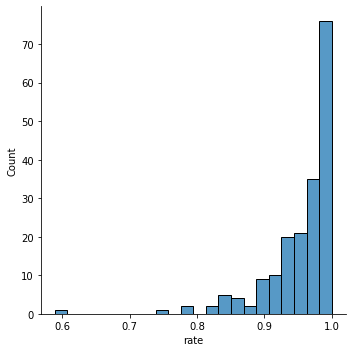

In [94]:
sns.displot(data=all_attempts, x='rate')

In [95]:
hard_test = all_attempts.iloc[all_attempts.rate.idxmin()].id_assessment

In [96]:
hard_test

15020.0

In [97]:
simple_test = all_attempts.query('rate == 1').id_assessment

In [98]:
# to find out in which courses these tests are given

In [99]:
hard_module = tests.query('id_assessment == @hard_test').code_module

In [100]:
hard_module

48    BBB
Name: code_module, dtype: object

In [101]:
simple_module = tests[['id_assessment', 'code_module']].query('id_assessment in @simple_test')

In [102]:
simple_module

,id_assessment,code_module
138,34879,FFF
151,34892,FFF
156,34896,FFF
166,34907,FFF
187,37429,GGG


The hardest test is 15020 in course BBB.

The simplest tests are 34879, 34892, 34896, 34907 in course FFF and 37429 in course GGG

In [103]:
# for analysis course completition using scores_for_module

# to count how many credits there were in the final examinations

In [104]:
good_exams = (scores_for_module.query('(id_assessment in @lst_exam) & (score >=40)')
                             .groupby('id_assessment', as_index=False)
                             .agg({'id_student': 'count'})
                             .rename(columns={'id_student': 'good_exam'})
            )

In [105]:
# to count all attemts to pass exams

In [106]:
total_exams = (scores_for_module.query('id_assessment in @lst_exam')
                             .groupby('id_assessment', as_index=False)
                             .agg({'id_student': 'count'})
                             .rename(columns={'id_student': 'total_exam'})
            )

In [107]:
all_exams = good_exams.merge(total_exams, on='id_assessment')

In [108]:
all_exams['rate'] = all_exams.good_exam / all_exams.total_exam

In [109]:
all_exams = all_exams.merge(tests[['code_module', 'code_presentation', 'id_assessment']], on='id_assessment')

In [110]:
# as only 2 courses are available for completion analysis, I decided to leave results in the table form

In [111]:
print('Completion of courses by semester \n \n {}'
      .format(all_exams[['code_module', 'code_presentation', 'rate']].sort_values('rate')))

Completion of courses by semester 
 
   code_module code_presentation      rate
2         DDD             2013B  0.839465
1         CCC             2014J  0.872322
5         DDD             2014J  0.885956
0         CCC             2014B  0.891275
3         DDD             2013J  0.908714
4         DDD             2014B  0.927063


In [112]:
print('Completion of courses excluding semesters \n \n {}'
      .format(all_exams.groupby('code_module', as_index=False)
                      .agg({'rate': 'mean'}))
               )

Completion of courses excluding semesters 
 
   code_module      rate
0         CCC  0.881799
1         DDD  0.890299


3. For each module to dtermine the average time for passing exams? (Passing is the last successfull completion of the exam)

In [113]:
# as in this question, passing refers to the last successful completion of the test regardless of the type of test,
# using scores_adjusted

# to find time of last successfull test for each student

In [114]:
last_time = (scores_adjusted.query('score >= 40')
                            .groupby(['code_module', 'id_student'], as_index=False)
                            .agg({'date_submitted': 'max'})
                            .rename(columns={'date_submitted': 'last_exam_time'})
             )

In [115]:
last_time.head()

,code_module,id_student,last_exam_time
0,AAA,100893,218
1,AAA,101116,215
2,AAA,101781,213
3,AAA,102806,215
4,AAA,102952,215


In [119]:
# to find the average time for each course

In [117]:
avg_time = (last_time.groupby('code_module', as_index=False)
                         .agg({'last_exam_time': 'mean'})
                         .rename(columns={'last_exam_time': 'avg_time'})
)

In [118]:
avg_time.head()

,code_module,avg_time
0,AAA,193.477679
1,BBB,166.295404
2,CCC,174.921431
3,DDD,179.230600
4,EEE,138.412132


In [120]:
print('The average test time by course \n \n {}'.format(avg_time))

The average test time by course 
 
   code_module    avg_time
0         AAA  193.477679
1         BBB  166.295404
2         CCC  174.921431
3         DDD  179.230600
4         EEE  138.412132
5         FFF  168.400505
6         GGG  194.842959


4. To identify the most popular courses (TOP-3) by number of registrations and courses with the highest churn rate (TOP-3).

In [121]:
# using registration_adj

# to count the number of registrations for each course

In [122]:
registration_cnt = (registration_adj.groupby('code_module', as_index=False)
                                    .agg({'id_student': 'count'})
                                    .rename(columns={'id_student': 'reg_cnt'}))

In [123]:
registration_cnt.sort_values('reg_cnt', ascending=False)

,code_module,reg_cnt
1,BBB,7900
5,FFF,7751
3,DDD,6257
2,CCC,4426
4,EEE,2932
6,GGG,2534
0,AAA,748


In [124]:
# to count the number of canceled registrations

In [125]:
unregistration_cnt = (registration_adj.query('date_unregistration == date_unregistration')
                                      .groupby('code_module', as_index=False)
                                      .agg({'id_student': 'count'})
                                      .rename(columns={'id_student': 'unreg_cnt'}))

In [126]:
unregistration_cnt.sort_values('unreg_cnt', ascending=False)

,code_module,unreg_cnt
5,FFF,2370
1,BBB,2369
3,DDD,2223
2,CCC,1940
4,EEE,716
6,GGG,289
0,AAA,126


In [127]:
# to count the relative number of cancelled registrations

In [128]:
total_registr = unregistration_cnt.merge(registration_cnt, on='code_module')

In [129]:
total_registr['rate'] = total_registr.unreg_cnt / total_registr.reg_cnt

In [130]:
total_registr.sort_values('rate', ascending=False)

,code_module,unreg_cnt,reg_cnt,rate
2,CCC,1940,4426,0.438319
3,DDD,2223,6257,0.355282
5,FFF,2370,7751,0.305767
1,BBB,2369,7900,0.299873
4,EEE,716,2932,0.244202
0,AAA,126,748,0.168449
6,GGG,289,2534,0.114049


Top 3 courses by number of registrations: BBB, FFF, DDD

Top 3 courses by absolute number of registrations cancelled: FFF, BBB, DDD

Top 3 courses by relative number of registrations cancelled: CCC, DDD, FFF

5. To write a function that allows to costract cohort (semester) analysis. Between early 2013 and late 2014 to identify the semester with the lowest course completition and the average course turnaround time.

In [131]:
# using scores_for_module as the question is about course completion
# for the function to work, it is important that the columns code_presentation and code_module columns 
# are attached to the dataframe with the scores

In [136]:
def cohort(df):
    good_exams = (df.query('(id_assessment in @lst_exam) & (score >=40)')
                         .groupby(['code_presentation', 'code_module', 'id_assessment'], as_index=False)
                         .agg({'id_student': 'count'})
                         .rename(columns={'id_student': 'good_exam'})
            )
    total_exams = (df.query('id_assessment in @lst_exam')
                             .groupby(['code_presentation', 'code_module', 'id_assessment'], as_index=False)
                             .agg({'id_student': 'count'})
                             .rename(columns={'id_student': 'total_exam'})
            )
    all_exams = good_exams.merge(total_exams, on=['code_presentation', 'id_assessment'])
    all_exams['rate'] = all_exams.good_exam / all_exams.total_exam
    pres_finality = (all_exams.groupby('code_presentation', as_index=False)
                              .agg({'rate': 'mean'})
                              )
    
    last_time = (df.query('score >= 40')
                            .groupby(['code_presentation', 'code_module', 'id_student'], as_index=False)
                            .agg({'date_submitted': 'max'})
                            .rename(columns={'date_submitted': 'last_exam_time'})
             )
             
    module_avg_time = (last_time.groupby(['code_presentation', 'code_module'], as_index=False)
                                 .agg({'last_exam_time': 'mean'})
                                 .rename(columns={'last_exam_time': 'avg_time_module'})
                )
                
    pres_avg_time = (module_avg_time.groupby('code_presentation', as_index=False)
                                   .agg({'avg_time_module': 'mean'})
                                   .rename(columns=({'avg_time_module': 'avg_time'}))

                )
    cohort_pres = pres_finality.merge(pres_avg_time, on='code_presentation')
    
    return print(cohort_pres, '\n', '\n',
                 'The minimum course completion rate is {min_rate} and refers to the semester {pres}'
                 .format(min_rate=round(cohort_pres.rate.min(), 2), 
                         pres=cohort_pres.code_presentation[cohort_pres.rate.idxmin()]),  '\n',
                 'The longest average time of a course is {avg_time} and refers to the semester {pres}'
                 .format(avg_time=round(cohort_pres.avg_time.max(), 2),
                         pres=cohort_pres.code_presentation[cohort_pres.avg_time.idxmax()])
                
                
                )

In [137]:
cohort(scores_for_module)

  code_presentation      rate    avg_time
0             2013B  0.839465  166.004883
1             2013J  0.908714  178.891409
2             2014B  0.909169  161.322598
3             2014J  0.879139  179.960950 
 
 The minimum course completion rate is 0.84 and refers to the semester 2013B 
 The longest average time of a course is 179.96 and refers to the semester 2014J


6. To construct RFM-clusters of students adapted to the learning objective , where R is the average exam turnaround time, F is course completion rate, M - the average score in an exam. To describe how clusters were created.

In [138]:
# using scores_for_module

In [139]:
scores_for_module.id_student.nunique()

7381

In [140]:
# to count R (the average exam turnaround time)

In [141]:
avg_time_to_test = (scores_for_module.groupby('id_student', as_index=False)
                                    .agg({'date_submitted': 'mean'})
                                    .rename(columns={'date_submitted': 'avg_time'}))

In [142]:
avg_time_to_test.head()

,id_student,avg_time
0,100561,116.714286
1,100788,140.000000
2,101279,34.000000
3,1018685,25.000000
4,102209,40.666667


In [143]:
avg_time_to_test.shape

(7381, 2)

In [144]:
avg_time_to_test.avg_time.describe()

count    7381.000000
mean       94.753536
std        40.830026
min         0.000000
25%        56.333333
50%       115.571429
75%       127.222222
max       241.000000
Name: avg_time, dtype: float64

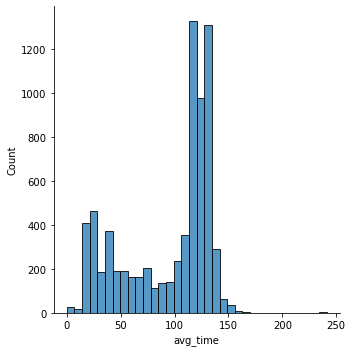

In [145]:
sns.displot(data=avg_time_to_test, x='avg_time')

To divide the average exam time into 4 quartile groups: from the smallest (1) to the largest (4)

In [146]:
time_boarders = avg_time_to_test.avg_time.quantile([0.25, 0.5, 0.75])

In [147]:
avg_time_to_test['time_group'] = (avg_time_to_test.avg_time
                                 .apply(lambda x: '1' if x < time_boarders[0.25] else 
                                        ('2' if x < time_boarders[0.5] else 
                                         ('3' if x < time_boarders[0.75] else '4')))
                                )

In [148]:
avg_time_to_test.head()

,id_student,avg_time,time_group
0,100561,116.714286,3
1,100788,140.000000,4
2,101279,34.000000,1
3,1018685,25.000000,1
4,102209,40.666667,1


In [149]:
avg_time_to_test.time_group.value_counts()

3    1866
4    1846
1    1842
2    1827
Name: time_group, dtype: int64

In [150]:
# to count F (course completion)

In [151]:
good_student = (scores_for_module.query('(id_assessment in @lst_exam) & (score >=40)')
                                 .groupby('id_student', as_index=False)
                                 .agg({'score': 'count'})
                                 .rename(columns={'score': 'good_cnt'})
            )

In [152]:
total_student = (scores_for_module.query('id_assessment in @lst_exam')
                                 .groupby('id_student', as_index=False)
                                 .agg({'score': 'count'})
                                 .rename(columns={'score': 'total_cnt'})
            )

In [153]:
all_student = good_student.merge(total_student, on='id_student')

In [154]:
all_student['rate'] = all_student.good_cnt / all_student.total_cnt

In [155]:
all_student.rate.describe()

count    4088.000000
mean        0.996575
std         0.041243
min         0.500000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: rate, dtype: float64

In [156]:
all_student.rate.value_counts()

1.0    4060
0.5      28
Name: rate, dtype: int64

Since course completion takes only 2 values, divide the students into 3 groups:

1 - completion == 0 (those who did not pass Exam)

2 - completion == 0.5

3 - completion == 1

In [157]:
all_student['finality_group'] = all_student.rate.apply(lambda x: '2' if x==0.5 else '3')

In [158]:
all_student.head()

,id_student,good_cnt,total_cnt,rate,finality_group
0,100788,1,1,1.0,3
1,102221,1,1,1.0,3
2,1023623,1,1,1.0,3
3,102850,1,1,1.0,3
4,1031884,2,2,1.0,3


In [159]:
# to add 0 value when merging dataframes, as all_student only contains students who have passed Exam

In [160]:
# to count M (the average score in an exam)

In [161]:
avg_score = (scores_for_module.groupby('id_student', as_index=False)
                            .agg({'score': 'mean'})
                            .rename(columns={'score': 'avg_score'})
    )

In [162]:
avg_score.avg_score.describe()

count    7378.000000
mean       67.665748
std        18.756923
min         0.000000
25%        56.125000
50%        70.000000
75%        82.000000
max       100.000000
Name: avg_score, dtype: float64

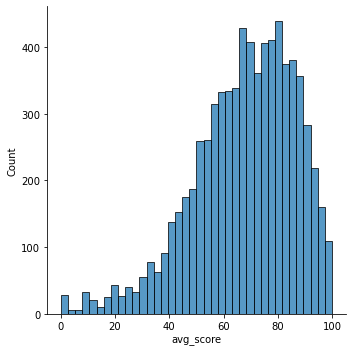

In [163]:
sns.displot(avg_score, x='avg_score')

Based on average grades, to divide students into 3 groups:

1 - students who received a 'failing score' on average - avg_score < 40

2 - students who received an average of 'credit' but did not receive very high scores (the first 50% of the remaining distribution)

3 - students who received an average of 'credit' and received high scores (the second 50% of the remaining distribution)

In [164]:
first_border = 40
second_border = avg_score.query('avg_score >= 40').avg_score.quantile(0.5)

In [165]:
avg_score['score_group'] = (avg_score.avg_score
                      .apply(lambda x: '1' if x < first_border else('2' if x < second_border else '3')))

In [166]:
avg_score.score_group.value_counts()

3    3411
2    3406
1     564
Name: score_group, dtype: int64

In [167]:
# to merge all df

In [169]:
student_groups = (avg_time_to_test[['id_student', 'time_group']]
                  .merge(all_student[['id_student', 'finality_group']]
                         .merge(avg_score[['id_student', 'score_group']], how='outer', on='id_student'))
                 
                 )

In [170]:
student_groups.isna().sum()

id_student           0
time_group           0
finality_group    3293
score_group          0
dtype: int64

In [171]:
student_groups = student_groups.fillna('1').rename(columns={'time_group': 'r', 'finality_group': 'f', 'score_group': 'm'})

In [172]:
student_groups.head()

,id_student,r,f,m
0,100561,3,1,2
1,100788,4,3,3
2,101279,1,1,2
3,1018685,1,1,2
4,102209,1,1,2


In [173]:
student_groups['rfm'] = student_groups.r + student_groups.f + student_groups.m

DF student_groups contains a list of students and clusters to which they belong

In [174]:
student_groups.head()

,id_student,r,f,m,rfm
0,100561,3,1,2,312
1,100788,4,3,3,433
2,101279,1,1,2,112
3,1018685,1,1,2,112
4,102209,1,1,2,112
